In [191]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

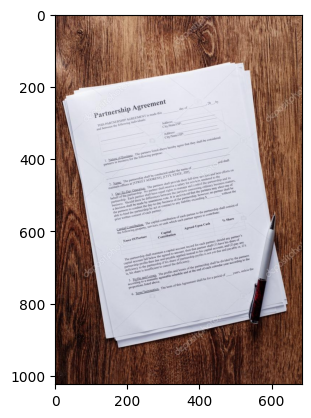

In [212]:
image = cv2.imread("document.jpg")
plt.imshow(image[...,::-1])

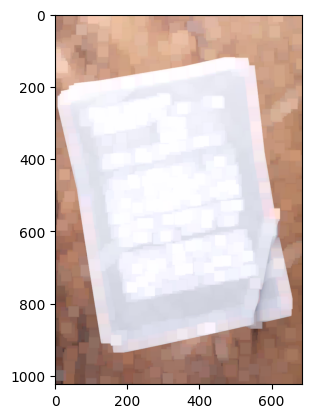

In [213]:
kernel = np.ones((5,5))
dilated = cv2.dilate(image,kernel,iterations=7)
plt.imshow(dilated[...,::-1])

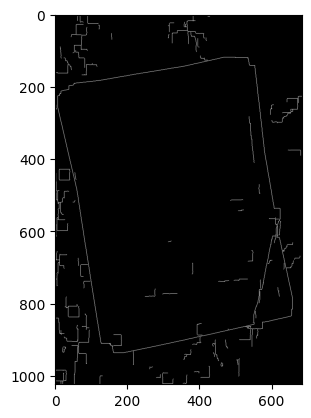

In [214]:
edge = cv2.Canny(dilated,60,120)
plt.imshow(edge,cmap="gray")

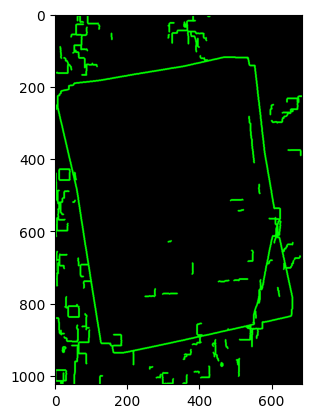

In [215]:
contours,hierarchy = cv2.findContours(edge,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
bgr_img=cv2.cvtColor(edge,cv2.COLOR_GRAY2BGR)
all_contours=cv2.drawContours(bgr_img,contours,-1,(0,255,0),3)
plt.imshow(all_contours[...,::-1])

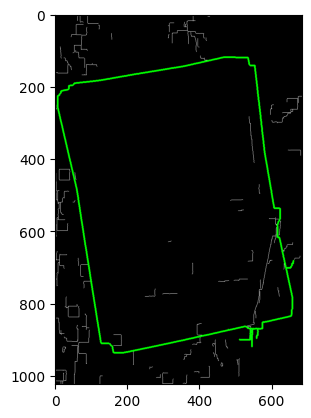

In [216]:
def proper_contour(all_contours,img):
    height = img.shape[0]
    width = img.shape[1]
    img_area = height*width
    proper = []
    for cnt in all_contours:
        area = cv2.contourArea(cnt)
        if area>0.4 * img_area:
            proper.append(cnt)
            break
    return proper  



proper_contours = proper_contour(contours,edge)
bgr_proper_img=cv2.cvtColor(edge,cv2.COLOR_GRAY2BGR)
all_proper_contours=cv2.drawContours(bgr_proper_img,proper_contours,-1,(0,255,0),3)
plt.imshow(all_proper_contours[...,::-1])

0.02


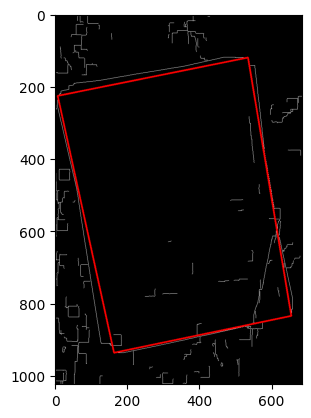

In [217]:
bgr_img=cv2.cvtColor(edge,cv2.COLOR_GRAY2BGR)
x=0.01
finish=False
while True:
    for c in proper_contours:
        accuracy = x * cv2.arcLength(c,True)
        approx = cv2.approxPolyDP(c,accuracy,True)
        if len(approx)==4:
            all_approx_contours=cv2.drawContours(bgr_img,[approx],-1,(0,0,255),3)
            plt.imshow(all_approx_contours[...,::-1])
            finish=True
            print(x)
            break
        else:
            x=x+0.01
            break
    if finish:
        break

In [218]:
def order_points(pts):
    rect = np.zeros((4,2),dtype="float32")
    pts = np.array(pts)
    s=pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts,axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect.astype('int').tolist()

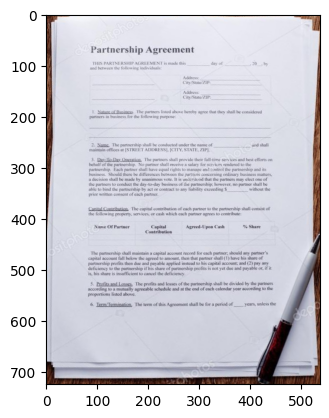

In [219]:
points = order_points([approx[0][0],approx[1][0],approx[2][0],approx[3][0]])

width = int(math.sqrt((points[0][0]-points[1][0])**2 + (points[0][1]-points[1][1])**2))
height = int(math.sqrt((points[2][0]-points[1][0])**2 + (points[2][1]-points[1][1])**2))

p1 = np.float32([points[0],points[1],points[2],points[3]])
p2 = np.float32([[0, 0],[width,0],[width,height],[0,height]])
M = cv2.getPerspectiveTransform(p1,p2)
dst = cv2.warpPerspective(image,M,(width,height))
plt.imshow(dst[...,::-1])